In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import *

In [12]:
df = pd.read_csv("../data/data.csv", index_col=0, parse_dates=['time'], squeeze=True)
df.index = df['time']

df = df.drop('time', axis=1)
df

,price
time,
2019-01-02 07:00:00+00:00,39.8100
2019-01-02 07:15:00+00:00,39.2350
2019-01-02 07:30:00+00:00,39.3625
2019-01-02 07:45:00+00:00,39.3825
2019-01-02 08:00:00+00:00,39.1250
...,...
2019-02-28 22:15:00+00:00,43.3125
2019-02-28 22:30:00+00:00,43.3025
2019-02-28 22:45:00+00:00,43.3200


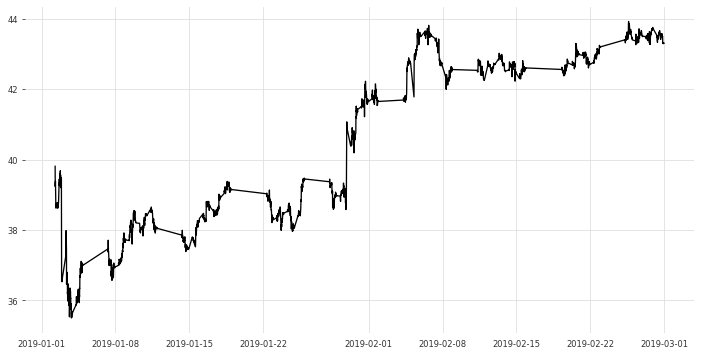

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

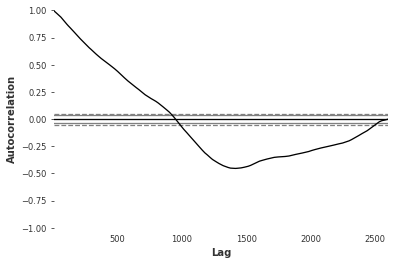

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

In [14]:
test_size = 65
train = df[:-test_size]
test = df[-test_size:]

In [15]:
series = TimeSeries.from_values(train.values)

In [24]:
model = ARIMA(p=500, d=1, q=0)

In [24]:
%%time
model_fit = model.fit(series)

print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\spark\.conda\envs\stan_env\lib\site-packages\IPython\core\magics\execution.py", line 1321, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 1, in <module>
  File "C:\Users\spark\.conda\envs\stan_env\lib\site-packages\darts\models\arima.py", line 70, in fit
    self.model = m.fit()
  File "C:\Users\spark\.conda\envs\stan_env\lib\site-packages\statsmodels\tsa\arima\model.py", line 363, in fit
    cov_type=cov_type, cov_kwds=cov_kwds, **method_kwargs)
  File "C:\Users\spark\.conda\envs\stan_env\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
  File "C:\Users\spark\.conda\envs\stan_env\lib\site-packages\statsmodels\base\model.py", line 527, in fit
    full_output=full_output)
  File "C:\Users\spark\.conda\envs\stan_env\lib\site-packages\statsmodels\base\optimizer.py", line 227, in _fit
    hess=hessian)
  File "C:\Users\spark\.conda\envs\stan_env\lib\site-packa

TypeError: object of type 'NoneType' has no len()

In [18]:
pred = model.predict(len(test)).pd_series()

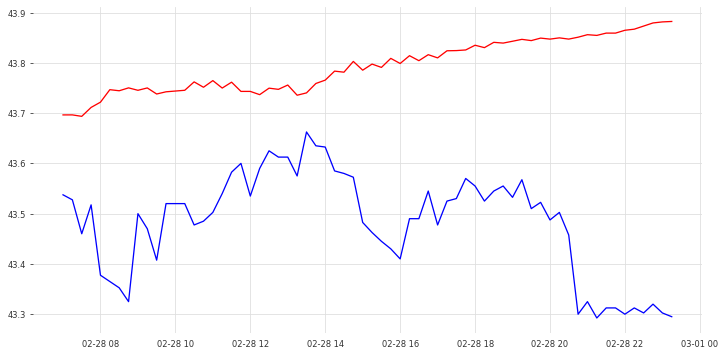

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test, c='b', label='true')
ax.plot(test.index, pred, c='r', label='predict')

plt.show()